# Microsoft Movie Analysis

**Author:** Mandele Frank
***
## Overview
This project is intended to help Microsoft make informed decisions on the type of movies to create in the new movie studio they wish to launch. It presents an Exploratory Data Analysis on data availed in various datasets by IMDB, The Numbers, Box Office Mojo on films, supplemented by visualizations including histograms, scatter plots, heatmaps, density plots that we can make inferences from to arrive at conclusions and make inferences from.
***

## Business Problem
Microsoft has taken a keen interest in film production and wishes to create its own film studio but has limited knowledge of the film industry, this project hopes to serve a guide to help Microsoft make an informed decision as they hope to venture into film production.

In a bid to shed some light on the problem, this project targets specific areas involved in film production such as film genres to better understand the categories that perform well, financial metrics e.g. Budgets and Revenues observed from films, viewer rating scores to have an idea on popular films, films durations and overall genres that dominate the flooded film industry.

Questions to be addressed in this project include.
* What are the top performing film genres in regards to financial metrics?
* Which genres/collective genres have the highest/lowest ratings?
* Which genres have the highest/lowest budgets required in production?
* Which are the top performing studios in film production?
***

## Data Understanding
This project features data sourced from: IMDB, The Numbers, and Box Office Mojo and aims to capture data on genres, production budgets, returns from films, viewer' ratings, film durations that is in the datasets from the aforementioned sources.
***


#### Importing Libraries and Loading the Dataset

In [37]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### Loading Datasets on Title and Ratings

In [38]:
#importing ratings data
df = pd.read_csv('title.ratings.csv')
df.shape # (73856, 3)
df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [39]:
#importing titles data
df1 = pd.read_csv('title.basics.csv')
df1.shape #(146144, 6)
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Merging Ratings with Titles Data

In [40]:
#performing 'inner' merge of the two dataframes on column 'tconst'
df1_2 = pd.merge(df, df1, on='tconst', how='inner')
df1.shape #(1446144, 6)
df1_2.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


#### Loading Datasets on Gross Returns

In [41]:
#Loading gross data
df3 = pd.read_csv('bom.movie_gross.csv')
df3.head()#3387 records, missing records in foreign gross = 1350, domestic gross = 28

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### Merging Gross Data with Titles-Rating Data

In [42]:
#Renaming column to be merged on
df3.rename({'title':'primary_title'}, axis=1, inplace=True)

#checking changes in column names
df3.columns #Index(['primary_title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

#Checking changes in number of records
df3.shape #(3387, 5)

#performing merge
df_123 = pd.merge(df3, df1_2, on='primary_title', how='inner')
df_123.head()

,primary_title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,8.3,682218,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,8.8,1841066,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,6.3,167532,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,5.0,211733,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,7.0,657690,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"


#### Budgets Data

In [43]:
#Loading data
df4 = pd.read_csv('tn.movie_budgets.csv')# 5782 rows × 6 columns
df4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Merging with Budgets Data

In [44]:
#Renaming merging column
df4.rename({'movie':'primary_title'}, axis=1, inplace=True)
df4.columns #Index(['id', 'release_date', 'primary_title', 'production_budget','domestic_gross', 'worldwide_gross'],dtype='object')

#performing inner merge
df_final = pd.merge(df_123, df4, on='primary_title', how='left')
df_final.head()

,primary_title,studio,domestic_gross_x,foreign_gross,year,tconst,averagerating,numvotes,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,8.3,682218,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,8.8,1841066,Inception,2010,148.0,"Action,Adventure,Sci-Fi",38.0,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,6.3,167532,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",27.0,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,5.0,211733,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",53.0,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,7.0,657690,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",15.0,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


## Dataset Preparation (Cleaning)
***

In [45]:
#Dropping Irrelevant columns
df_final.drop(columns=['tconst', 'original_title', 'id', 'domestic_gross_y', 'worldwide_gross', 'release_date', 'start_year'], inplace=True)

#checking changes
df_final.columns #Index(['primary_title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year','averagerating', 'numvotes', 'runtime_minutes', 'genres','production_budget'],dtype='object')

Index(['primary_title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year',
       'averagerating', 'numvotes', 'runtime_minutes', 'genres',
       'production_budget'],
      dtype='object')

In [46]:
#checking dtypes
df_final.dtypes #domestic gross & production budget are in object dtypes, other dypes are in alignment


primary_title         object
studio                object
domestic_gross_x     float64
foreign_gross         object
year                   int64
averagerating        float64
numvotes               int64
runtime_minutes      float64
genres                object
production_budget     object
dtype: object

In [47]:
#changing data dtypes to be in alignment
#changing the currency columns to numeric data
def clean_currency_column(df, column_name):
    df_final[column_name] = df_final[column_name].str.replace('$', '').str.replace(',', '').astype(float)
    return df

clean_currency_column(df_final, 'production_budget')
clean_currency_column(df_final, 'foreign_gross')

#dtypes sanity check
df_final.dtypes

primary_title         object
studio                object
domestic_gross_x     float64
foreign_gross        float64
year                   int64
averagerating        float64
numvotes               int64
runtime_minutes      float64
genres                object
production_budget    float64
dtype: object

#### Handling Missing Values and Duplicates

*Duplicates*

In [48]:
#checking for duplicates
df_final.duplicated().sum() #2 duplicated entries

# #inspecting duplicates(preview)
df_final.loc[df_final.duplicated()]

#dropping duplicated records
df_final.drop_duplicates(inplace=True)

In [49]:
#checking for duplicates in 'primary_title' column
df_final['primary_title'].duplicated().sum() # 447 duplicated

#inspecting the duplicated records(preview)
df_final.loc[df_final['primary_title'].duplicated()]

#dropping duplicated movies
df_final.drop_duplicates(subset='primary_title', inplace=True)

#sanity check
df_final.shape #(2598, 10)


(2598, 10)

*Missing Values*

In [50]:
#checking for null values
df_final.isna().sum()

primary_title           0
studio                  3
domestic_gross_x       17
foreign_gross        1040
year                    0
averagerating           0
numvotes                0
runtime_minutes        17
genres                  3
production_budget    1441
dtype: int64

#### *Visualizing Distribution of Values in Columns with Null Values*

c:\Users\G\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\G\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


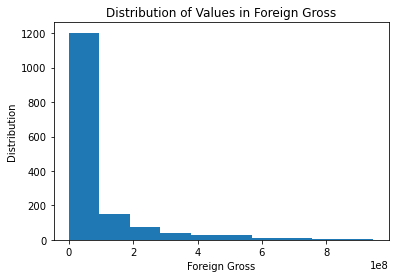

In [51]:
# foreign gross value-ditribution
#set up hist plot
plt.hist(df_final['foreign_gross'], bins=10)

# Adding extra features   
plt.xlabel("Foreign Gross")
plt.ylabel("Distribution")
plt.title('Distribution of Values in Foreign Gross')

#show plot
plt.show()

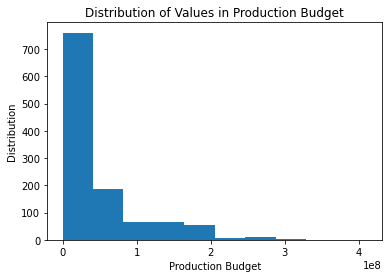

In [52]:
#Production Budget value-ditribution
#set up hist plot
plt.hist(df_final['production_budget'], bins=10)

# Adding extra features   
plt.xlabel("Production Budget")
plt.ylabel("Distribution")
plt.title('Distribution of Values in Production Budget')

#show plot
plt.show()

The distribution of values in both `Production Budget` and `Domestic Gross` appear to be skewed and therefore modal values or ffill/bfill techniques look fitting instead of mean values.

To fill the missing values, forward fill `(ffill)` in applied on the dataset

In [53]:
#applying ffill() to specific columns using a loop
cols = ['production_budget', 'foreign_gross', 'runtime_minutes', 'domestic_gross_x' ]

for col in ['production_budget', 'foreign_gross', 'runtime_minutes', 'domestic_gross_x' ]:
    df_final[col] = df_final[col].ffill(limit=5)

#sanity check for null values
df_final.isna().sum()


primary_title          0
studio                 3
domestic_gross_x       0
foreign_gross        564
year                   0
averagerating          0
numvotes               0
runtime_minutes        0
genres                 3
production_budget    654
dtype: int64

In [54]:
#applying bfill() to specific columns using a loop
cols = ['production_budget', 'foreign_gross', 'runtime_minutes', 'domestic_gross_x' ]

for col in ['production_budget', 'foreign_gross', 'runtime_minutes', 'domestic_gross_x' ]:
    df_final[col] = df_final[col].bfill(limit=5)

#sanity check
df_final.isna().sum()

primary_title          0
studio                 3
domestic_gross_x       0
foreign_gross        451
year                   0
averagerating          0
numvotes               0
runtime_minutes        0
genres                 3
production_budget    451
dtype: int64

In [55]:
df_final.describe()

,domestic_gross_x,foreign_gross,year,averagerating,numvotes,runtime_minutes,production_budget
count,2.598000e+03,2.147000e+03,2598.000000,2598.000000,2.598000e+03,2598.000000,2.147000e+03
mean,3.081885e+07,6.790546e+07,2014.053118,6.485296,6.805675e+04,108.253272,3.591348e+07
std,6.763990e+07,1.471002e+08,2.422195,0.965971,1.318556e+05,19.422242,5.196638e+07
min,1.000000e+02,6.000000e+02,2010.000000,1.600000,5.000000e+00,40.000000,5.000000e+04
25%,1.382500e+05,1.000000e+06,2012.000000,6.000000,3.619750e+03,95.000000,5.000000e+06
50%,1.900000e+06,8.900000e+06,2014.000000,6.600000,1.657100e+04,105.000000,1.500000e+07
75%,3.200000e+07,5.460000e+07,2016.000000,7.200000,7.258700e+04,119.000000,4.000000e+07
max,7.001000e+08,9.464000e+08,2018.000000,8.900000,1.841066e+06,272.000000,4.106000e+08


In [56]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 0 to 3046
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2598 non-null   object 
 1   studio             2595 non-null   object 
 2   domestic_gross_x   2598 non-null   float64
 3   foreign_gross      2147 non-null   float64
 4   year               2598 non-null   int64  
 5   averagerating      2598 non-null   float64
 6   numvotes           2598 non-null   int64  
 7   runtime_minutes    2598 non-null   float64
 8   genres             2595 non-null   object 
 9   production_budget  2147 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 223.3+ KB


In [57]:
#filling null values with their respective modal value using a loop
cols1 = ['production_budget', 'foreign_gross' ]
for col in ['production_budget', 'foreign_gross' ]:
    df_final[col] = df_final[col].fillna(df_final[col].mode()[0])

#filling 'missing' for null  value in columns 'studio' and 'genres'
cols2 = ['studio', 'genres' ]
for col in ['studio', 'genres' ]:
    df_final[col] = df_final[col].fillna('Missing')

#sanity check
df_final.isna().sum()


primary_title        0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
averagerating        0
numvotes             0
runtime_minutes      0
genres               0
production_budget    0
dtype: int64

## Data Modeling (Relational Analysis)

In [72]:
df_final.describe()

,domestic_gross_x,foreign_gross,year,averagerating,numvotes,runtime_minutes,production_budget
count,2.598000e+03,2.598000e+03,2598.000000,2598.000000,2.598000e+03,2598.000000,2.598000e+03
mean,3.081885e+07,5.630836e+07,2014.053118,6.485296,6.805675e+04,108.253272,3.141503e+07
std,6.763990e+07,1.360926e+08,2.422195,0.965971,1.318556e+05,19.422242,4.824833e+07
min,1.000000e+02,6.000000e+02,2010.000000,1.600000,5.000000e+00,40.000000,5.000000e+04
25%,1.382500e+05,1.100000e+06,2012.000000,6.000000,3.619750e+03,95.000000,8.000000e+06
50%,1.900000e+06,4.099999e+06,2014.000000,6.600000,1.657100e+04,105.000000,1.000000e+07
75%,3.200000e+07,3.817500e+07,2016.000000,7.200000,7.258700e+04,119.000000,3.237500e+07
max,7.001000e+08,9.464000e+08,2018.000000,8.900000,1.841066e+06,272.000000,4.106000e+08


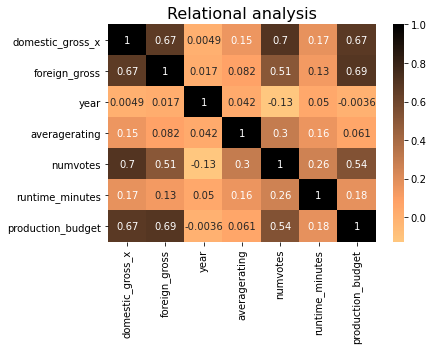

In [58]:
# #finding correlations in the dataset
# plotting correlation heatmap as ax
ax = sns.heatmap(df_final.corr(), cmap='copper_r', annot=True)
  
# displaying heatmap
ax.set_title("Relational analysis", fontsize=16)
plt.show()

**Observations and Interpretations:**
\
\
Overall, the variables in the dataset are positively correlated(except for  instances of `year` that has **-ve annotations**) with some correlations being fairly stronger than others. This can be observed through the annotations in the plots. Positive values show positive correlation whereas the magnitude of the annotations indicate strength of correlation with `1.0` being the highest value.

In the case of `production_budget`, `foreign_gross` and `domestic_gross_x` for example, the correlation is moderately strong. 

#### **Domestic Gross** vs **Foreign Gross** Relational Analysis

*Scatter Plot*

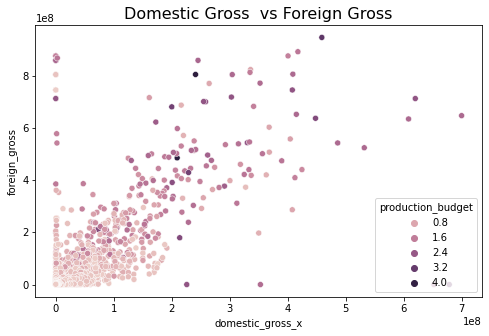

In [59]:
#setting up plots
fig,ax = plt.subplots(figsize=(8,5))
ax = sns.scatterplot(x='domestic_gross_x',
    y='foreign_gross',
    hue='production_budget',
    data=df_final)
ax.set_title('Domestic Gross  vs Foreign Gross', fontsize=16)
plt.show()

**Observations and Interpretations:**


The points in the plot appear to be grouped in a manner that shows an upward trend from the origin (0,0). This is an indication that `domestic_gross_x` and `foreign_gross` are positively correlated.

Whenever `domestic_gross_x` increased, there appear to be a corresponding increment in `foreign_gross` as well. It is also worth noting the increasing number of dark spots representing `production_budget` as the spots spread away from the origin.

#### **Production Budget** vs **Foreign Gross** Relational Analysis


*Scatter plot*

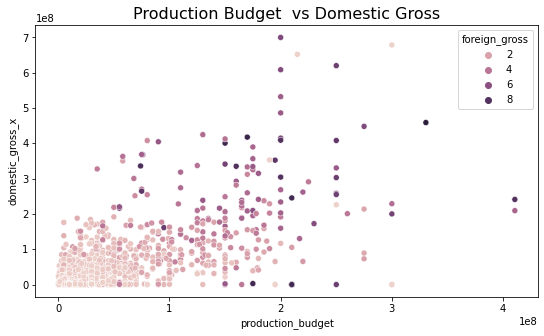

In [60]:
fig,ax = plt.subplots(figsize=(9,5))
ax = sns.scatterplot(x='production_budget',
    y='domestic_gross_x',
    hue='foreign_gross',
    data=df_final)
ax.set_title('Production Budget  vs Domestic Gross', fontsize=16)
plt.show()

*Observations and Interpretations:*

From the visualization, `production_budget` and `domestic_gross_x` portray an overall positive correlation that appears to weak. 

Increased production budget has an corresponding general increment in Domestic gross as well. Analysis for `foreign_gross` with `production_budget` was intentionally skipped since data on `foreign_gross` had a lot of missing values.

### The Best Performing Genres in the Country

##### In order to get the film genres with the highest returns from sales, I have grouped the dataset by `genres` to make `genres` data as my `'focus data'` and ordered the records in `descending` order using `domestic_gross_x` column to do the ordering; then performed `.head()` method to get the top genres.
##### A `Bar graph` plot is used to show the `top genres`.
##### The top genres are restricted to a sample of 10 so as to include genres that might have just made it to the list. This was intended to ensure variety in the analysis.


In [61]:
#grouping the dataset by genres
genres_df = df_final.groupby('genres', as_index=False).mean()
genres_df.reset_index()
#sorting the records in descending order using Domestic gross
dg_genres_df = genres_df.sort_values('domestic_gross_x', ascending=False)


#### Top 10 Genres by *Domestic Revenue*

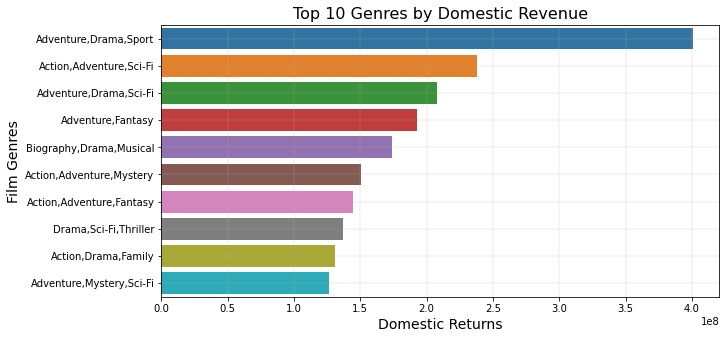

In [75]:
#setting up plot 
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'domestic_gross_x',
            y = 'genres',
            data = dg_genres_df.head(10)
            )

plt.title('Top 10 Genres by Domestic Revenue', fontsize=16)
plt.xlabel('Domestic Returns', fontsize=14)
plt.ylabel('Film Genres', fontsize=14)

#displaying the gridlines and setting width visibility to 0.25
ax.grid(True, linewidth=0.25)

# Show the plot
plt.show()

*Observations and Intepretations:*

 From the visualization, (Adventure, Drama, Sport) genres show the highest sales observed domestically by a significant margin, followed by (Action, Adventure, Sci-Fi) whereas
 
 (Adventure, Mystery, Sci-Fi) recorded the lowest sales domestically.

#### Top 10 Genres by Production Budget

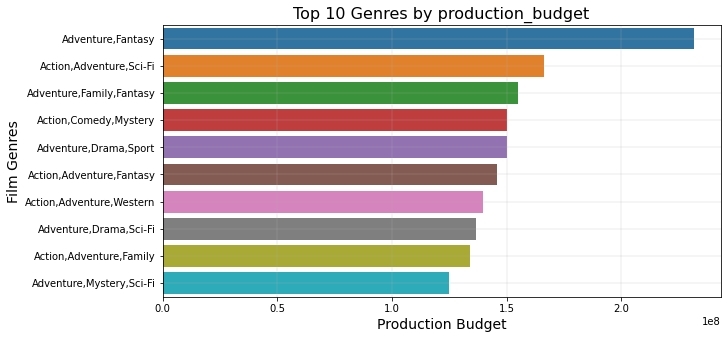

In [76]:
#sorting the records in descending order using Production Budget
pb_genres_df = genres_df.sort_values('production_budget', ascending=False)

#setting up plot 
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'production_budget',
            y = 'genres',
            data = pb_genres_df.head(10)
            )

plt.title('Top 10 Genres by production_budget', fontsize=16)
plt.xlabel('Production Budget', fontsize=14)
plt.ylabel('Film Genres', fontsize=14)

#displaying the gridlines and setting width visibility to 0.25
ax.grid(True, linewidth=0.25)

# Show the plot
plt.show()

In regards to Film Production Budgets, Adventure, Fantasy recorded the highest Budgets whereas Adventure, Mystery, Sci-fi recorded the lowest production budget.

### Genres Distribution

To better understand the most common types of film genres in the film industry, I split the collective genres into individual genres, checked for the value counts 

of each genre and did a bar plot to visualize the individual genres.

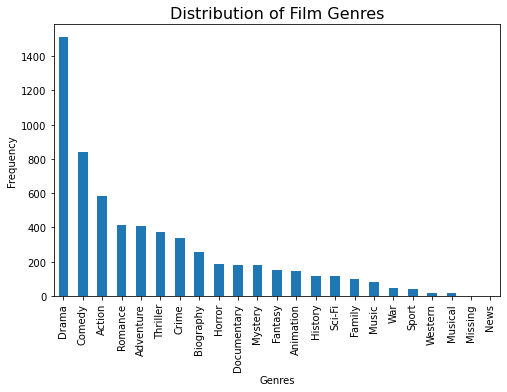

In [64]:
#separating genre data to have individual genres
genres_df1 = df_final.copy()

genres_df1['genres'] = genres_df1['genres'].str.split(',')

#exploding the genres column to yield multiple rows for each film by genre
genres_df1 = genres_df1.explode('genres')

#checking the changes
genres_df1['genres'].value_counts()

#plotting the genre distributions in a bar graph plot
genres_df1['genres'].value_counts().plot(kind='bar', xlabel='Genres', ylabel='Frequency', figsize=(8,5))

#setting title                                        
plt.title('Distribution of Film Genres', fontsize=16)

plt.show()

*Observations and Interpretations*

A great majority of films made are seen to have the genre 'drama' by a big margin, followed by 'comedy' and 'action' films. 'Sport' and 'News' closes the list


### Popular Genres by Ratings

To get the popular genres, `df_genres` is sorted by the `averagerating`. Then .head() executed on the the sorted dataframe 

In [65]:
#sorting the dataframe by averagerating and assigning to variable 
genre_rating_df = genres_df.sort_values('averagerating', ascending=False)

genre_rating_df[['genres', 'averagerating']].head()

,genres,averagerating
74,"Action,Sport",8.4
230,"Documentary,History,War",8.4
234,"Documentary,News",8.3
103,"Adventure,Drama,Sci-Fi",8.3
129,"Animation,Drama,Romance",8.2


Top Genres by Ratings Visualized

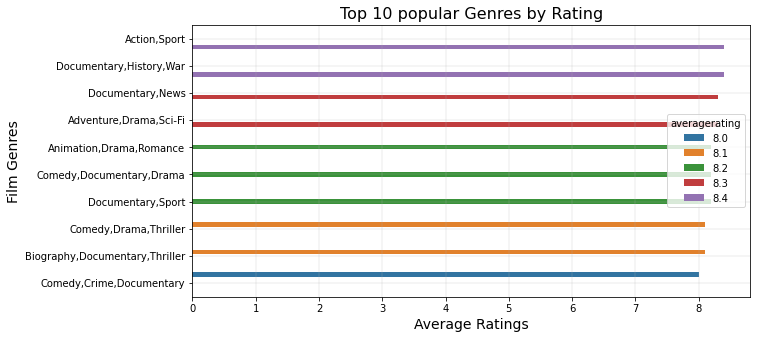

In [66]:
#setting up plot 
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'averagerating',
            y = 'genres',
            data = genre_rating_df.head(10),
            hue= 'averagerating')

plt.title('Top 10 popular Genres by Rating', fontsize=16)
plt.xlabel('Average Ratings', fontsize=14)
plt.ylabel('Film Genres', fontsize=14)

#displaying the gridlines and setting width visibility to 0.25
ax.grid(True, linewidth=0.25)

# Show the plot
plt.show()

*Observations and interpretations*
 
Action, sport and Documentary, History, War genres are rated to be the most popular in terms of rating. This ratings however seeks further clarity since the data might be from a smaller number of votes and therefore might easily create the element of bias in the analysis and therefore not give a true depiction of what is popular to the viewers.

As a result, there's further analysis on the number of votes in the dataset

*Distribution of Votes on Genres Data*

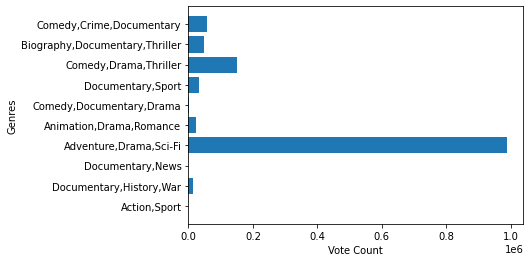

In [67]:
#plotting the genre distributions in a bar graph plot
x = genre_rating_df['genres'].head(10)
y = genre_rating_df['numvotes'].head(10)

plt.barh(x, y)
plt.ylabel('Genres')
plt.xlabel('Vote Count')

plt.show()

As observed from the plot above, there is a huge variation of number of counts with the respective genres. The `ratings` therefore might not be a proper presentation of how popular a film genre is since the rating, as seen from the visualization might be from a smaller group of viewers.

### Distribution of Runtime Minutes

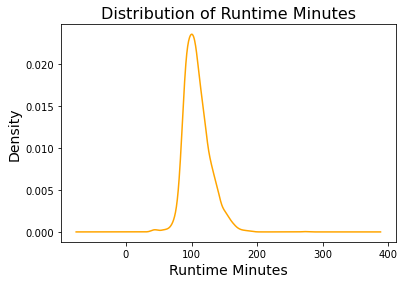

In [68]:
#plotting the genre distributions of runtimes in a density plot
ax = df_final['runtime_minutes'].plot.density(color='orange')

ax.set_title('Distribution of Runtime Minutes', fontsize=16)
ax.set_xlabel('Runtime Minutes', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
plt.show()


Using a density plot, we can figure out films with durations of approximately 90 minutes were the most common for films because of it being high peak region.

Majority of the films are roughly an hour and a half long

### Best Performing Studios

In [69]:
#unique studios
df_final['studio'].value_counts().head(10)

IFC      128
Uni.     127
Fox      117
WB       105
Magn.    100
SPC       94
BV        86
Sony      82
Par.      80
LGF       80
Name: studio, dtype: int64

In [74]:
#grouping datafame by studio
df_studio = df_final.groupby('studio', as_index=False).mean()

#sorting values by domestic_gross
df_studio.sort_values('domestic_gross_x', ascending=False, inplace=True)

df_studio.head(10)

,studio,domestic_gross_x,foreign_gross,year,averagerating,numvotes,runtime_minutes,production_budget
32,BV,1.683256e+08,2.483378e+08,2013.953488,6.943023,213940.790698,112.383721,1.215267e+08
145,P/DW,1.682900e+08,3.393600e+08,2010.900000,6.760000,213462.000000,101.500000,1.334000e+08
208,WB (NL),9.119512e+07,1.418512e+08,2014.268293,6.268293,144118.731707,109.219512,5.781951e+07
199,Uni.,9.004535e+07,1.178328e+08,2013.984252,6.288976,129320.181102,108.795276,5.568268e+07
207,WB,8.863143e+07,1.345151e+08,2013.790476,6.572381,200884.438095,113.009524,8.097619e+07
119,MGM,8.300000e+07,5.630000e+07,2014.000000,6.800000,113232.500000,115.500000,4.300000e+07
81,Fox,8.238718e+07,1.521484e+08,2013.811966,6.389744,153415.572650,108.829060,6.954615e+07
155,Par.,8.230891e+07,1.231057e+08,2014.000000,6.396250,184726.625000,110.637500,6.658250e+07
182,Sony,8.167023e+07,1.293161e+08,2013.987805,6.217073,134122.048780,110.012195,6.650488e+07
185,Sum.,5.172258e+07,6.649633e+07,2010.500000,6.416667,103950.750000,100.333333,3.415000e+07


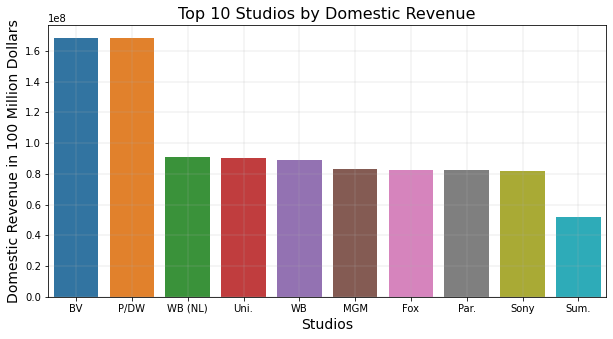

In [71]:
#setting up plot 
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'studio',
            y = 'domestic_gross_x',
            data = df_studio.head(10)
            )

plt.title('Top 10 Studios by Domestic Revenue', fontsize=16)
plt.xlabel('Studios', fontsize=14)
plt.ylabel('Domestic Revenue in 100 Million Dollars', fontsize=14)

#displaying the gridlines and setting width visibility to 0.25
ax.grid(True, linewidth=0.25)

# Show the plot
plt.show()

Studios `BV` and `PD` tops the list of Top 10 studios by Domestic Revenue. The films produced under the two studios yielded the highest returns whereas `Sum` closes the top performers list

## Evaluation
***
* *Heatmap*

Overall, the variables in the dataset are positively correlated(except for two instances of `year` that has **-ve annotations**) with some correlations being fairly stronger than others. This can be observed through the annotations in the heatmap plot. Positive values show positive correlation whereas the magnitude of the annotations indicate strength of correlation with `1.0` being the highest value.

In the case of `production_budget`, `foreign_gross` and `domestic_gross_x` for example, the correlation is moderately strong. 

* *Scatter plot*

The points in the plot appear to be grouped in a manner that shows an upward trend from the origin (0,0). This is an indication that `domestic_gross_x` and `foreign_gross` are positively correlated.

Whenever `domestic_gross_x` increased, there appear to be a corresponding increment in `foreign_gross` as well. It is also worth noting the increasing number of dark spots representing `production_budget` as the spots spread away from the origin.

* *Top 10 Genres by Domestic Revenue*

 From the visualization, (Adventure, Drama, Sport) genres show the highest sales observed domestically by a significant margin, followed by (Action, Adventure, Sci-Fi) whereas
 (Adventure, Mystery, Sci-Fi) recorded the lowest sales domestically.

* *Genres Distribution*

A great majority of films made are seen to have the genre 'drama' by a big margin, followed by 'comedy' and 'action' films. 'Sport' and 'News' closes the list

* *Top genres by Ratings*

Action, sport and Documentary, History, War genres are rated to be the most popular in terms of rating. This ratings however seeks further clarity since the data might be from a smaller number of votes and therefore might easily create the element of bias in the analysis and therefore not give a true depiction of what is popular to the viewers.
As a result, further investigation is done on number of votes and from the visualization, there is a huge variation of number of counts with the respective genres. The `ratings` therefore might not be a proper presentation of how popular a film genre is since the rating, as seen from the visualization might be from a smaller group of viewers.

* *Genre Distribution*

Majority of the films are roughly an hour and a half long

* *Studio Performance*

Studios `BV` and `PD` tops the list of Top 10 studios by Domestic Revenue. The films produced under the two studios yielded the highest returns whereas `Sum` closes the top performers list

## Conclusions
***
Based on the results of the analysis it appears to be more profitable for Microsoft to engage in films genres that featured in the top 10 categories using film samples produced by some of the top studios to learn what makes them standout in the film industry.
Production budgets is also estimated to be around 50,000 dollars to around 410 million dollars(min-max generated from descriptive statistics).
Something worth noting also is the fact that Adventure, Drama, Sci-Fi ranked 3rd in terms of rating but had the highest number of votes count but a staggering majority, we can conclusively say it's easily the most popular genres by numbers despite not appearing as the first, in addition, the difference in rating in quite small.

It might also be important to consider data on `budget` and `domestic gross` might not be the actual representation of the real values given the fact that the data had quite a number of missing values and therefore this analysis is more of an estimate of the real figures. During the analysis process, I observed cases where similar movies had varying data across the different sources such as different runtime minutes, production budgets, genres and foreign gross. 

This analysis alone might not be sufficient to film production since it only offers insight based on general descriptive data and not technical bit of production.
